# Estudio y evaluación de los salarios.
Completa el cuaderno proporcinado con el código necesario.

El dataset a análizar contiene una tabla estructurada con los siguientes datos:

    work_year: El año en el que el salario fue pagado.
    experience_level: El nivel de experiencia de una persona en un puesto de trabajo durante el año en cuestión que sigue los siguientes posibles valores:

    EN: Entry-level / Junior
    MI: Mid-level / Intermedio
    SE: Senior-level / Experto
    EX: Executive-level / Director

    employment_type: El tipo de empleo para el puesto de trabajo:

    PT: Part-time
    FT: Full-time
    CT: Contract
    FL: Freelance

    job_title: El puesto de trabajo para el año en curso.
    salary: El salario total como concepto de pago.
    salary_currency: El tipo de cambio utilizado para cancelar el sueldo como codigo tipo ISO 4217.
    salary_in_usd: El salario en el tipo de cambio USD (cambio relativo utilizando el valor promedio de dolar, extraido desde este sitio).
    employee_residence: País de residencia principal del empleado durante el año laboral como código de país ISO 3166.
    remote_ratio: La cantidad total de trabajo realizado de forma remota, los valores posibles son los siguientes:

    0: Sin trabajo remoto (menos del 20%)
    50: Parcialmente remoto
    100: Completamente remoto (más del 80%)

    company_location: El país de la oficina principal del empleador o sucursal contratante como un código de país ISO 3166.
    company_size: El valor promedio del número de personas trabajando durante el año en curso:

    S: menos de 50 empleados (small)
    M: entre 50 a 250 empleados (medium)
    L: más de 250 empleados (large)
    job_title_copy: copia del puesto de trabajo


## 1. Importar las librerias

In [1]:

#El primer paso consiste en importar las librerías para el desarrollo del proyecto.
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

## 2. Cargar y previsualizar el dataset

In [2]:
#### 2.1 Carga del dataset a partir de la excel proporcionada
salarios = pd.read_excel("salarios.xlsx")

In [3]:
# Un análisis previo permite identificar la estructura general de este archivo.
print("Los datos contenidos en el dataset cargado tiene una estructura de {} columnas y {} filas.".format(salarios.shape[1],salarios.shape[0]))

Los datos contenidos en el dataset cargado tiene una estructura de 12 columnas y 1331 filas.


In [4]:
# Los primeros datos que se pueden apreciar son:
salarios.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_title_copy
0,2022,MI,FT,Machine Learning Engineer,130000.0,USD,130000.0,US,0,US,M,Machine Learning Engineer
1,2022,MI,FT,Machine Learning Engineer,90000.0,USD,90000.0,US,0,US,M,Machine Learning Engineer
2,2022,MI,FT,Data Scientist,120000.0,USD,120000.0,US,100,US,M,Data Scientist
3,2022,MI,FT,Data Scientist,100000.0,USD,100000.0,US,100,US,M,Data Scientist
4,2022,MI,FT,Data Scientist,85000.0,USD,85000.0,US,100,US,M,Data Scientist


In [5]:
# Mientras que los últimos registros se muestran como:
salarios.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_title_copy
1326,2020,SE,FT,Data Scientist,412000.0,USD,412000.0,US,100,US,L,Data Scientist
1327,2021,MI,FT,Principal Data Scientist,151000.0,USD,151000.0,US,100,US,L,Principal Data Scientist
1328,2020,EN,FT,Data Scientist,105000.0,USD,105000.0,US,100,US,S,Data Scientist
1329,2020,EN,CT,Business Data Analyst,100000.0,USD,100000.0,US,100,US,L,Business Data Analyst
1330,2021,SE,FT,Data Science Manager,7000000.0,INR,94665.0,IN,50,IN,L,Data Science Manager


## 3. Manipulación del dataset

In [6]:
# Verificar si existen valores nulos en las columnas del dataset
salarios.isnull().sum()

work_year              0
experience_level       0
employment_type        0
job_title             25
salary                53
salary_currency        0
salary_in_usd          3
employee_residence     0
remote_ratio           0
company_location       0
company_size           0
job_title_copy        25
dtype: int64

In [7]:
#Si los hay, rellenalos con 0 los que sean de tipo numérico y con "U", los de tipo object
salarios['job_title '] = salarios['job_title '].fillna('U')
salarios['salary'] = salarios['salary'].fillna(0)
salarios['salary_in_usd'] = salarios['salary_in_usd'].fillna(0)
salarios['job_title_copy'] = salarios['job_title_copy'].fillna('U')

In [8]:
# Analiza el dataset para ver si alguna de las columnas tiene algún valor no esperado, errores en los nombres de las columnas e incluso alguna columna no necesaria
#set(salarios['experience_level'])
set(salarios['employment_type'])
#set(salarios['salary_currency'])
#set(salarios['employee_residence'])
#set(salarios['remote_ratio'])
#set(salarios['company_location'])
#set(salarios['company_size'])



{'CT', 'FL', 'FT', 'FullTime', 'PT'}

In [9]:
salarios['employment_type'] = salarios['employment_type'].str.replace('FullTime','FT', regex=True)
salarios['salary_currency'] = salarios['salary_currency'].str.replace('D¢lar','USD', regex=True)
salarios.columns.str.strip()
salarios.drop(['job_title_copy'], axis=1)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,MI,FT,Machine Learning Engineer,130000.0,USD,130000.0,US,0,US,M
1,2022,MI,FT,Machine Learning Engineer,90000.0,USD,90000.0,US,0,US,M
2,2022,MI,FT,Data Scientist,120000.0,USD,120000.0,US,100,US,M
3,2022,MI,FT,Data Scientist,100000.0,USD,100000.0,US,100,US,M
4,2022,MI,FT,Data Scientist,85000.0,USD,85000.0,US,100,US,M
...,...,...,...,...,...,...,...,...,...,...,...
1326,2020,SE,FT,Data Scientist,412000.0,USD,412000.0,US,100,US,L
1327,2021,MI,FT,Principal Data Scientist,151000.0,USD,151000.0,US,100,US,L
1328,2020,EN,FT,Data Scientist,105000.0,USD,105000.0,US,100,US,S
1329,2020,EN,CT,Business Data Analyst,100000.0,USD,100000.0,US,100,US,L


## 4. Visualización del dataset

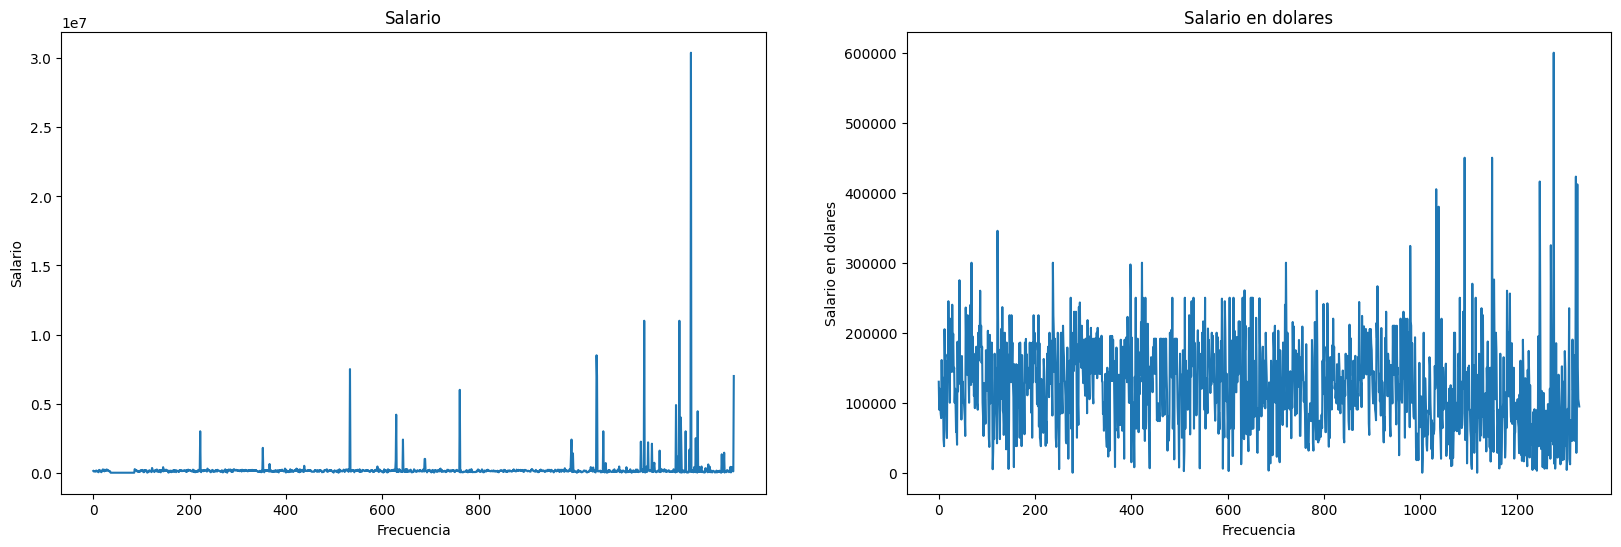

In [10]:
# Visualización de las dos columnas que contienen información respecto a los salarios, en dos gráficos de línea distintos
# dale el tamaño suficiente para que se vea bien el gráfico
# Tiene que resultar algo similar a esto
plt.style.use('default')
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
plt.plot(salarios['salary'])
plt.title("Salario")
plt.xlabel("Frecuencia")
plt.ylabel("Salario")
plt.subplot(1, 2, 2)
plt.plot(salarios['salary_in_usd']) 
plt.title("Salario en dolares")
plt.xlabel("Frecuencia")
plt.ylabel("Salario en dolares")
plt.show()




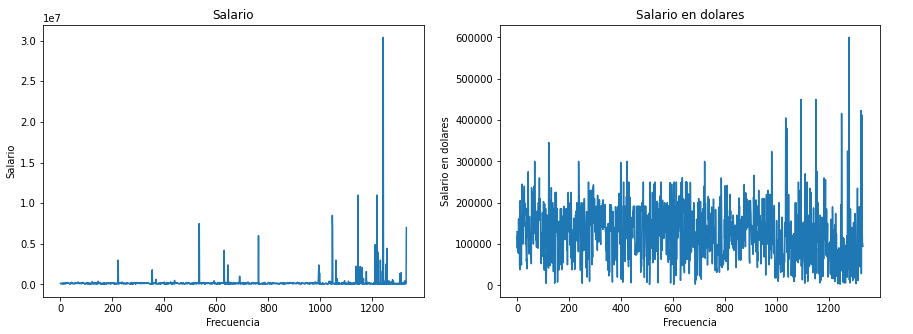

In [11]:
print("Hay un total de {} tipos de cambios diferentes".format(len(set(salarios['salary_currency']))))
#Muéstralos
set(salarios['salary_currency'])

Hay un total de 18 tipos de cambios diferentes


{'AUD',
 'BRL',
 'CAD',
 'CHF',
 'CLP',
 'CNY',
 'CZK',
 'DKK',
 'EUR',
 'GBP',
 'HUF',
 'INR',
 'JPY',
 'MXN',
 'PLN',
 'SGD',
 'TRY',
 'USD'}

In [12]:
print('¿Cuántos job titles hay en el dataset? : ',len(set(salarios['job_title '])))

¿Cuántos job titles hay en el dataset? :  64


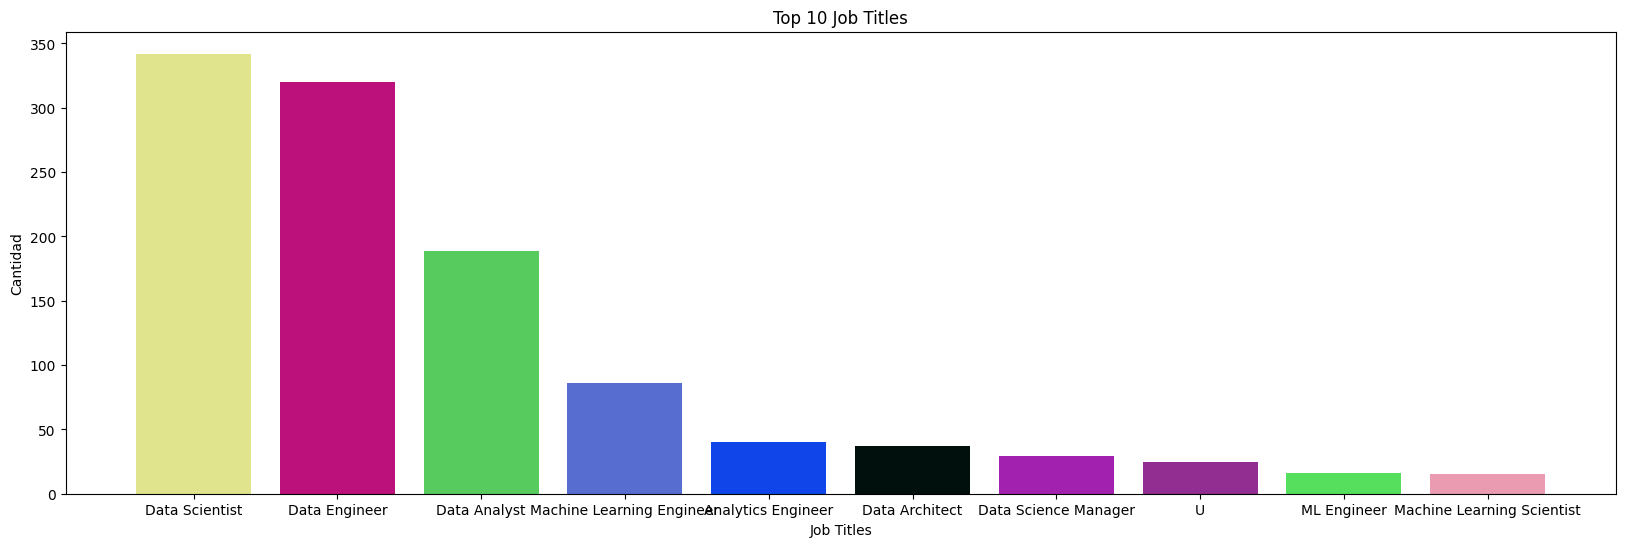

In [15]:
##Dibuja un diagrama de barras para ver el top 10 job titles 
# puedes usar value_counts(), que te retorna los atributos que necesitas para el eje x y eje y
top10_job_title = salarios['job_title '].value_counts().head(10).rename_axis('x').reset_index(name='y')
c=np.random.rand(len(top10_job_title),3)
plt.style.use('default')
plt.figure(figsize=(20,6))
plt.bar(top10_job_title['x'],top10_job_title['y'], color=c) 
plt.title("Top 10 Job Titles")
plt.xlabel("Job Titles")
plt.ylabel("Cantidad")
plt.show()


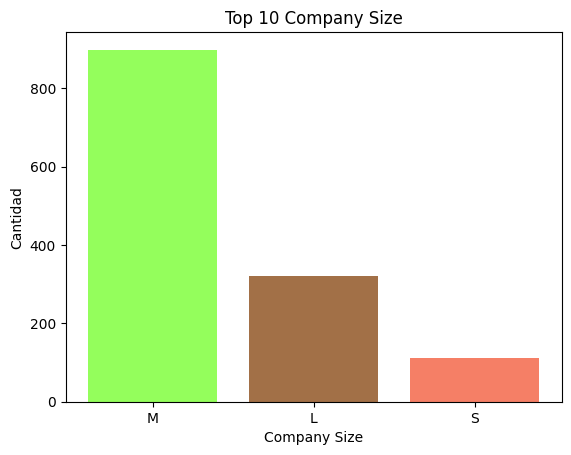

In [16]:
##Dibuja un diagrama de barras analizando  Company Size
# puedes usar value_counts(), que te retorna los atributos que necesitas para el eje x y eje y
top10_company_size = salarios['company_size'].value_counts().rename_axis('x').reset_index(name='y')
c=np.random.rand(len(top10_company_size),3)
plt.style.use('default')
plt.bar(top10_company_size['x'],top10_company_size['y'], color=c) 
plt.title("Top 10 Company Size")
plt.xlabel("Company Size")
plt.ylabel("Cantidad")
plt.show()